#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/competitions/desafio-de-prediccion-de-precios-de-portatiles

## Librerias

In [178]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import toolbox_ML as tl 
import re

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



## Data

In [123]:
train_df = pd.read_csv('./data/train.csv', sep = ',')

## Data exploration

In [124]:
train_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


In [125]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [126]:
train_df['TypeName'].value_counts()

TypeName
Notebook              522
Gaming                138
Ultrabook             135
2 in 1 Convertible     85
Workstation            18
Netbook                14
Name: count, dtype: int64

In [127]:
train_df['Price_euros'].value_counts()

Price_euros
1099.00    12
1499.00    11
1799.00     9
899.00      9
369.00      8
           ..
2250.68     1
414.90      1
857.07      1
470.34      1
1775.00     1
Name: count, Length: 614, dtype: int64

In [128]:
train_df['Company'].value_counts()

Company
Lenovo       208
Dell         207
HP           189
Asus         108
Acer          75
Toshiba       37
MSI           34
Apple         17
Mediacom       7
Razer          6
Samsung        6
Fujitsu        3
Microsoft      3
Vero           3
Xiaomi         3
Google         2
Chuwi          2
LG             1
Huawei         1
Name: count, dtype: int64

In [129]:
train_df['Inches'].value_counts()

Inches
15.6    474
14.0    143
13.3    111
17.3    108
12.5     28
11.6     21
12.0      6
10.1      4
13.9      4
15.4      3
15.0      3
13.5      3
12.3      2
13.0      1
18.4      1
Name: count, dtype: int64

In [130]:
train_df['Ram'].value_counts()

Ram
8GB     434
4GB     274
16GB    125
6GB      32
2GB      16
12GB     15
32GB     14
24GB      2
Name: count, dtype: int64

In [131]:
train_df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     142
Intel Core i7 7700HQ 2.8GHz    102
Intel Core i7 7500U 2.7GHz      88
Intel Core i5 8250U 1.6GHz      54
Intel Core i5 6200U 2.3GHz      51
                              ... 
Intel Core i7 7660U 2.5GHz       1
AMD E-Series E2-9000 2.2GHz      1
Intel Core i3 6006U 2.2GHz       1
Intel Core i7 2.8GHz             1
AMD E-Series 9000 2.2GHz         1
Name: count, Length: 104, dtype: int64

In [132]:
train_df['Cpu'].unique()

array(['Intel Core i7 7500U 2.7GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Core i5 6200U 2.3GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 6300U 2.4GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Pentium Quad Core N3710 1.6GHz',
       'Intel Core i7 8550U 1.8GHz', 'AMD A9-Series A9-9420 3GHz',
       'Intel Pentium Dual Core 4405U 2.1GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 7100U 2.4GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Xeon E3-1535M v6 3.1GHz',
       'Intel Atom x5-Z8550 1.44GHz', 'AMD A10-Series 9620P 2.5GHz',
       'Intel Core i5 7300U 2.6GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i7 6500U 2.5GHz', 'Intel Core i3 6006U 2.0GHz',
       'Intel Celeron Dual Core 3205U 1.5GHz',
       'AMD A12-Series 9720P 3.6GHz',
       'Intel Celeron Dual Core N3050 1.6GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'Intel Core i5 7200U 2.7GHz', 'Intel Core i7 7820HQ 2.9GHz

In [133]:
train_df['Memory'].value_counts()

Memory
256GB SSD                        293
1TB HDD                          150
500GB HDD                        100
512GB SSD                         75
128GB SSD +  1TB HDD              61
128GB SSD                         56
256GB SSD +  1TB HDD              52
32GB Flash Storage                27
64GB Flash Storage                11
2TB HDD                           11
512GB SSD +  1TB HDD              10
1TB SSD                            9
1.0TB Hybrid                       7
256GB Flash Storage                7
32GB SSD                           5
180GB SSD                          5
256GB SSD +  2TB HDD               4
16GB Flash Storage                 4
16GB SSD                           3
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
128GB Flash Storage                2
512GB SSD +  2TB HDD               2
512GB Flash Storage                2
1.0TB HDD                          1
32GB HDD                           1
128GB SSD +  2TB HDD           

In [134]:
train_df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      199
Intel HD Graphics 520      138
Intel UHD Graphics 620      45
Nvidia GeForce GTX 1050     43
Nvidia GeForce GTX 1060     31
                          ... 
Nvidia GeForce 920MX         1
Intel HD Graphics 620        1
AMD Radeon R7 M365X          1
Nvidia Quadro M2200M         1
Nvidia Quadro M520M          1
Name: count, Length: 91, dtype: int64

In [135]:
train_df['OpSys'].value_counts()

OpSys
Windows 10      746
Linux            47
No OS            44
Windows 7        32
Chrome OS        20
macOS            11
Mac OS X          6
Windows 10 S      4
Android           2
Name: count, dtype: int64

In [136]:
train_df['Weight'].value_counts()

Weight
2.2kg     86
2.1kg     40
2.3kg     35
2.4kg     31
2kg       30
          ..
4.0kg      1
0.98kg     1
3.6kg      1
2.99kg     1
1.79kg     1
Name: count, Length: 158, dtype: int64

In [137]:
train_df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                346
1366x768                                         208
IPS Panel Full HD 1920x1080                      163
IPS Panel Full HD / Touchscreen 1920x1080         37
Full HD / Touchscreen 1920x1080                   32
Touchscreen 1366x768                              15
1600x900                                          11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                8
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      8
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 5
IPS Panel 1366x768                                 5
4K Ultra HD 3840x2160                              5
IPS Panel Touchscreen 1920x1200                    4
Touchscreen 2560x1440                              4
IPS Panel Quad HD+ / Touchscreen 3200x1800         4
IPS Panel Touchscreen 2560x14

In [138]:
train_df['Price_euros'].describe()

count     912.000000
mean     1108.122873
std       714.597741
min       174.000000
25%       589.000000
50%       949.000000
75%      1458.500000
max      6099.000000
Name: Price_euros, dtype: float64

In [139]:
train_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


In [140]:
train_df.columns

Index(['id', 'laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

## Data processing

In [141]:
# Transformacion 'Ram'

train_df['Ram'] = train_df['Ram'].str.replace('GB', '').astype(int)

In [142]:
# Transformacion 'Weight'

train_df['Weight'] = train_df['Weight'].str.replace('kg', '').astype(float)

In [143]:
# Transformacion 'ScreenResolution' 

def extract_resolution(resolution):
    match = re.search(r'(\d+x\d+)', resolution)
    if match:
        return match.group(0)
    else:
        return None
    
train_df['Resolution'] = train_df['ScreenResolution'].apply(extract_resolution)
train_df[['Width_res', 'Height_res']] = train_df['Resolution'].str.split('x', expand=True).astype(int)

# Añado columna con la multiplicacion de las 2 de resolucion
train_df['Ress_total'] = train_df['Width_res'] * train_df['Height_res']

train_df.drop('Resolution', axis=1, inplace=True)
train_df.drop('ScreenResolution', axis=1, inplace=True)
train_df.drop('Width_res', axis=1, inplace=True)
train_df.drop('Height_res', axis=1, inplace=True)

In [144]:
train_df

,id,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Ress_total
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,749.00,1049088
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,449.00,1049088
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,1460.00,2073600
3,578,767,Dell,Alienware 17,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2868.99,8294400
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,1713.37,2073600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,389.00,1049088
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.20,1195.00,2073600
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,AMD A8-Series 7410 2.2GHz,8,1TB HDD,AMD Radeon R5,Windows 10,2.40,449.00,1049088
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,1775.00,2073600


In [145]:
# # Transformacion 'Memory'

# def process_memory(mem):
#     # Eliminar caracteres no numéricos y dividir por palabras clave
#     parts = re.findall(r'(\d+)(?:GB|TB|HDD|SSD|Flash)', mem)
#     # Convertir las partes a enteros y sumarlas
#     total_mem = sum(int(part) for part in parts)
#     return total_mem

# train_df['Memory'] = train_df['Memory'].apply(process_memory)

In [146]:
train_df['Memory'].dtype

dtype('O')

In [147]:
def process_memory(mem):
    # Extraer partes numéricas y tipos de almacenamiento
    parts = re.findall(r'(\d+)(GB|TB|HDD|SSD|Flash)', mem)
    
    total_mem_gb = 0
    storage_type = set()
    
    for part in parts:
        num, unit = part
        num = int(num)
        
        # Convertir TB y Flash a GB si es necesario
        if unit == 'TB' or unit == 'Flash':
            num *= 1000
        
        total_mem_gb += num
        
        # Agregar tipo de almacenamiento a la lista
        if 'HDD' in mem:
            storage_type.add('HDD')
        if 'SSD' in mem:
            storage_type.add('SSD')
        if 'Flash' in mem:
            storage_type.add('Flash')
    
    # Convertir conjunto de tipos de almacenamiento a string
    storage_type = '/'.join(storage_type)
    
    return total_mem_gb, storage_type

# Aplicar la función al DataFrame
train_df[['Memory_GB', 'Storage_Type']] = train_df['Memory'].apply(lambda x: pd.Series(process_memory(x)))

# Elimiar columna 'Memory'
train_df.drop('Memory', axis=1, inplace=True)

In [148]:
# Mapeado para Storeage_type
storage_mapping = {
    '': 0,      
    'HDD': 1,
    'SSD': 2,
    'HDD/SSD': 3,
    'Flash': 4,
    'Others': 5,
}

# Aplicar el mapeo a la columna Storage_Type
train_df['Storage_Type_Numeric'] = train_df['Storage_Type'].map(storage_mapping)

# Llenar valores NaN con 0 (o cualquier otro valor predeterminado) y convertir a enteros
train_df['Storage_Type_Numeric'] = train_df['Storage_Type_Numeric'].fillna(0).astype(int)

# Eliminar columna 

In [149]:
train_df.drop('Storage_Type', axis = 1, inplace = True)

In [150]:
train_df['Cpu'].unique()

array(['Intel Core i7 7500U 2.7GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Core i5 6200U 2.3GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 6300U 2.4GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Pentium Quad Core N3710 1.6GHz',
       'Intel Core i7 8550U 1.8GHz', 'AMD A9-Series A9-9420 3GHz',
       'Intel Pentium Dual Core 4405U 2.1GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 7100U 2.4GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Xeon E3-1535M v6 3.1GHz',
       'Intel Atom x5-Z8550 1.44GHz', 'AMD A10-Series 9620P 2.5GHz',
       'Intel Core i5 7300U 2.6GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i7 6500U 2.5GHz', 'Intel Core i3 6006U 2.0GHz',
       'Intel Celeron Dual Core 3205U 1.5GHz',
       'AMD A12-Series 9720P 3.6GHz',
       'Intel Celeron Dual Core N3050 1.6GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'Intel Core i5 7200U 2.7GHz', 'Intel Core i7 7820HQ 2.9GHz

In [151]:
# Transformacion 'Cpu'

def process_cpu(cpu):
    # Extraer la serie del procesador 
    series_match = re.search(r'i(\d)', cpu)
    if series_match:
        series = int(series_match.group(1))  
    else:
        series = 0 
    
    # Extraer la generación del procesador
    generation_match = re.search(r'i\d\s*(\d+)', cpu)
    if generation_match:
        generation = int(generation_match.group(1)[:2]) 
    else:
        generation = 0  

    # Extraer la velocidad del reloj
    clock_speed_match = re.search(r'(\d+\.\d+)GHz', cpu)
    if clock_speed_match:
        clock_speed = float(clock_speed_match.group(1))  
    else:
        clock_speed = 0.0  
    
    return series, generation, clock_speed

# Aplicar la función a la columna 'Cpu' y dividir en tres columnas
cpu_info = train_df['Cpu'].apply(process_cpu)
train_df['Cpu_Series'] = cpu_info.apply(lambda x: x[0])
train_df['Cpu_Generation'] = cpu_info.apply(lambda x: x[1])
train_df['Cpu_Clock_Speed'] = cpu_info.apply(lambda x: x[2])

# Elimnar columna Cpu
train_df.drop('Cpu', axis=1, inplace=True)

In [152]:
train_df[['Cpu_Series','Cpu_Generation', 'Cpu_Clock_Speed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cpu_Series       912 non-null    int64  
 1   Cpu_Generation   912 non-null    int64  
 2   Cpu_Clock_Speed  912 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 21.5 KB


In [153]:
train_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Ress_total,Memory_GB,Storage_Type_Numeric,Cpu_Series,Cpu_Generation,Cpu_Clock_Speed
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,8,AMD Radeon R7 M445,Windows 10,2.36,749.00,1049088,1000,1,7,75,2.7
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,4,Intel HD Graphics 505,Windows 10,2.00,449.00,1049088,1000,1,0,0,1.1
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,8,Intel HD Graphics 520,Windows 7,1.20,1460.00,2073600,256,2,5,62,2.3
3,578,767,Dell,Alienware 17,Gaming,15.6,16,Nvidia GeForce GTX 1070,Windows 10,4.42,2868.99,8294400,1256,3,7,77,2.8
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,8,Intel HD Graphics 520,Windows 7,1.26,1713.37,2073600,256,2,5,63,2.4


In [154]:
# Transformacion 'TypeName'

le = LabelEncoder()
le.fit(train_df['TypeName'])
train_df["TypeName_encode"] = le.transform(train_df['TypeName'])

train_df.drop('TypeName', axis=1, inplace=True)

In [155]:
# Transformacion 'OpSys'

le.fit(train_df['OpSys'])
train_df["OpSys_encode"] = le.transform(train_df['OpSys'])

train_df.drop('OpSys', axis=1, inplace=True)

In [156]:
train_df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      199
Intel HD Graphics 520      138
Intel UHD Graphics 620      45
Nvidia GeForce GTX 1050     43
Nvidia GeForce GTX 1060     31
                          ... 
Nvidia GeForce 920MX         1
Intel HD Graphics 620        1
AMD Radeon R7 M365X          1
Nvidia Quadro M2200M         1
Nvidia Quadro M520M          1
Name: count, Length: 91, dtype: int64

In [157]:
# Transformacion Gpu 

def extract_gpu_info(gpu):
    manufacturer_mapping = {'Intel': 1, 'Nvidia': 2, 'AMD': 3}
    
    if 'AMD' in gpu:
        manufacturer = 'AMD'
    elif 'Intel' in gpu:
        manufacturer = 'Intel'
    elif 'Nvidia' in gpu:
        manufacturer = 'Nvidia'
    else:
        manufacturer = 'Other'
    
    model_numbers = ' '.join(re.findall(r'\d+', gpu))
    model_number = int(model_numbers[0]) if model_numbers else 0  

    manufacturer_code = manufacturer_mapping.get(manufacturer, 0)  
    
    return manufacturer, model_number, manufacturer_code

# Aplicar la función extract_gpu_info al DataFrame
train_df['GPU_Manufacturer'], train_df['GPU_Model_Number'], train_df['GPU_Manufacturer_Code'] = zip(*train_df['Gpu'].apply(extract_gpu_info))

# Eliminar columnas 
train_df.drop('Gpu', axis=1, inplace=True)
train_df.drop('GPU_Manufacturer', axis=1, inplace=True)

In [158]:
train_df[['GPU_Model_Number', 'GPU_Manufacturer_Code']].dtypes

GPU_Model_Number         int64
GPU_Manufacturer_Code    int64
dtype: object

In [159]:
train_df['Company'].value_counts()

Company
Lenovo       208
Dell         207
HP           189
Asus         108
Acer          75
Toshiba       37
MSI           34
Apple         17
Mediacom       7
Razer          6
Samsung        6
Fujitsu        3
Microsoft      3
Vero           3
Xiaomi         3
Google         2
Chuwi          2
LG             1
Huawei         1
Name: count, dtype: int64

In [160]:
train_df[['Company', 'Price_euros']]

,Company,Price_euros
0,Dell,749.00
1,Asus,449.00
2,Toshiba,1460.00
3,Dell,2868.99
4,Dell,1713.37
...,...,...
907,Acer,389.00
908,Toshiba,1195.00
909,Acer,449.00
910,Dell,1775.00


In [161]:
company_counts = train_df['Company'].value_counts()
companies_less_than_6 = company_counts[company_counts < 6].index
filtered_data = train_df[train_df['Company'].isin(companies_less_than_6)][['Company', 'Price_euros']]
filtered_data

,Company,Price_euros
54,Fujitsu,649.00
154,Fujitsu,739.00
225,LG,2299.00
289,Microsoft,1867.85
357,Vero,202.90
384,Google,1559.00
420,Huawei,1349.00
489,Vero,260.00
545,Fujitsu,799.00
546,Microsoft,1340.00


In [162]:
# Transformar 'Company'

# NO ME CONVENCE

# Calcular la media del precio para cada compañía
company_price_mean = train_df.groupby('Company')['Price_euros'].mean()

# Mapear la columna Company a la media del precio
train_df['Company_Mean_Price'] = train_df['Company'].map(company_price_mean)

# Ver las primeras filas para verificar las transformaciones
train_df[['Company', 'Company_Mean_Price', 'Price_euros']].head()

,Company,Company_Mean_Price,Price_euros
0,Dell,1175.476570,749.00
1,Asus,1034.531852,449.00
2,Toshiba,1236.594595,1460.00
3,Dell,1175.476570,2868.99
4,Dell,1175.476570,1713.37


In [163]:
train_df.columns

Index(['id', 'laptop_ID', 'Company', 'Product', 'Inches', 'Ram', 'Weight',
       'Price_euros', 'Ress_total', 'Memory_GB', 'Storage_Type_Numeric',
       'Cpu_Series', 'Cpu_Generation', 'Cpu_Clock_Speed', 'TypeName_encode',
       'OpSys_encode', 'GPU_Model_Number', 'GPU_Manufacturer_Code',
       'Company_Mean_Price'],
      dtype='object')

In [164]:
# Eliminacion 'Product'
train_df.drop('Product', axis = 1, inplace = True)
train_df.drop('Company', axis = 1, inplace = True)

In [165]:
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     912 non-null    int64  
 1   laptop_ID              912 non-null    int64  
 2   Inches                 912 non-null    float64
 3   Ram                    912 non-null    int32  
 4   Weight                 912 non-null    float64
 5   Price_euros            912 non-null    float64
 6   Ress_total             912 non-null    int32  
 7   Memory_GB              912 non-null    int64  
 8   Storage_Type_Numeric   912 non-null    int32  
 9   Cpu_Series             912 non-null    int64  
 10  Cpu_Generation         912 non-null    int64  
 11  Cpu_Clock_Speed        912 non-null    float64
 12  TypeName_encode        912 non-null    int32  
 13  OpSys_encode           912 non-null    int32  
 14  GPU_Model_Number       912 non-null    int64  
 15  GPU_Ma

,id,laptop_ID,Inches,Ram,Weight,Price_euros,Ress_total,Memory_GB,Storage_Type_Numeric,Cpu_Series,Cpu_Generation,Cpu_Clock_Speed,TypeName_encode,OpSys_encode,GPU_Model_Number,GPU_Manufacturer_Code,Company_Mean_Price
0,268,1002,15.6,8,2.36,749.00,1049088,1000,1,7,75,2.7,3,5,7,3,1175.476570
1,347,867,15.6,4,2.00,449.00,1049088,1000,1,0,0,1.1,3,5,5,1,1034.531852
2,353,966,13.3,8,1.20,1460.00,2073600,256,2,5,62,2.3,3,7,5,1,1236.594595
3,578,767,15.6,16,4.42,2868.99,8294400,1256,3,7,77,2.8,1,5,1,2,1175.476570
4,42,1241,12.5,8,1.26,1713.37,2073600,256,2,5,63,2.4,4,7,5,1,1175.476570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,11.6,4,1.25,389.00,1049088,32,4,0,0,1.6,0,1,4,1,644.774800
908,716,1018,13.3,4,1.20,1195.00,2073600,128,2,5,62,2.3,3,5,5,1,1236.594595
909,517,1071,15.6,8,2.40,449.00,1049088,1000,1,0,0,2.2,3,5,5,3,644.774800
910,891,965,14.0,8,1.36,1775.00,2073600,256,2,7,76,2.8,4,5,6,1,1175.476570


-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [173]:
target = 'Price_euros'

In [167]:
X = train_df.drop(['Price_euros'], axis = 1)
y = train_df['Price_euros']

### 2. Dividir X_train, X_test, y_train, y_test

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 3. Crear y entrenar el modelo


MINI-EDA

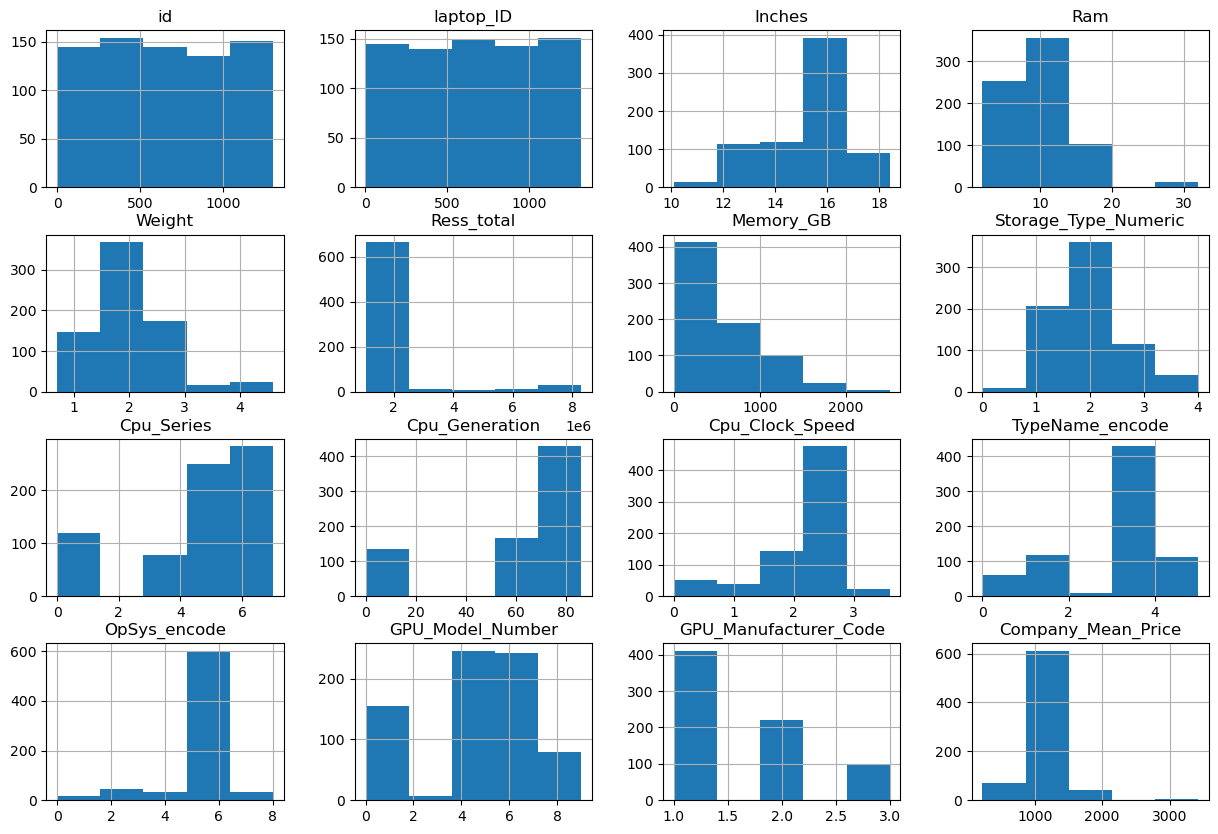

In [ ]:
X_train.hist(bins = 5, figsize = (15, 10));

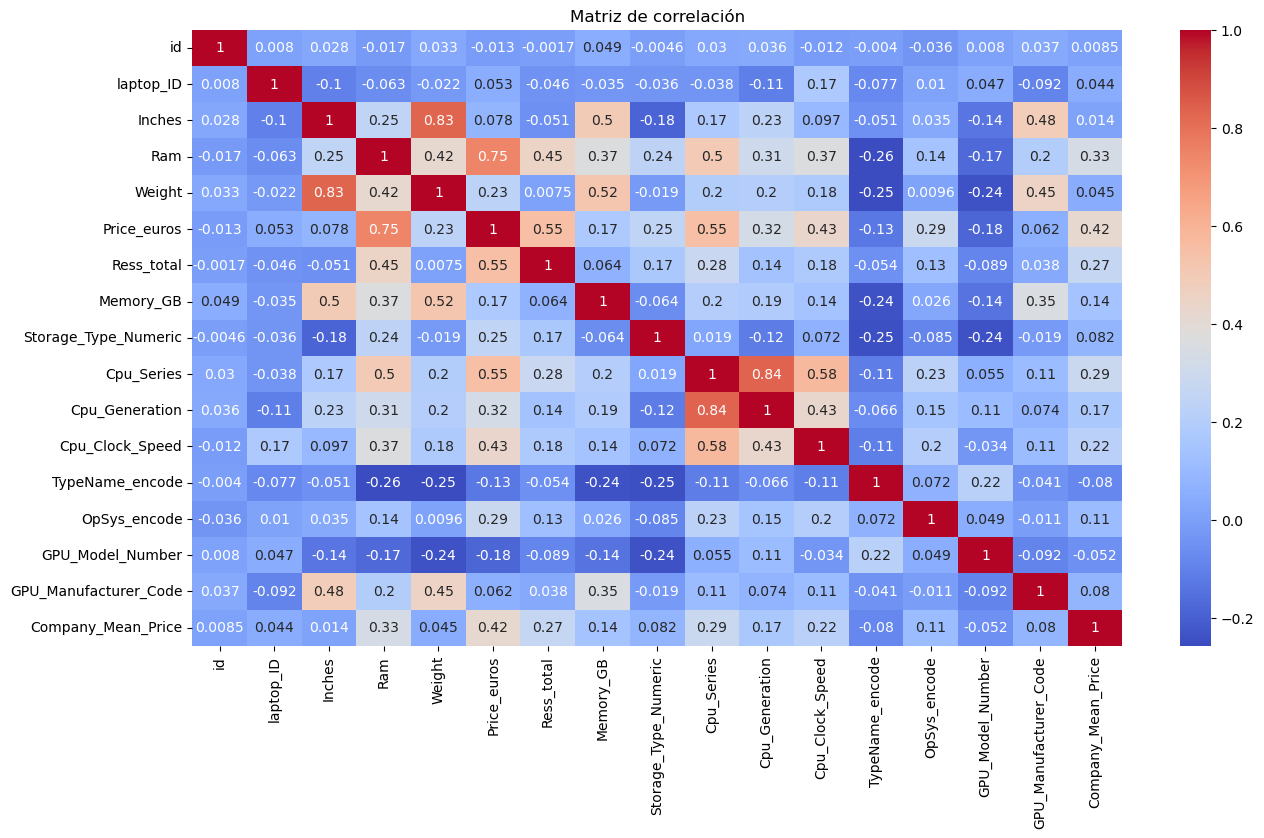

In [182]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [ ]:
X_train

,id,laptop_ID,Inches,Ram,Weight,Ress_total,Memory_GB,Storage_Type_Numeric,Cpu_Series,Cpu_Generation,Cpu_Clock_Speed,TypeName_encode,OpSys_encode,GPU_Model_Number,GPU_Manufacturer_Code,Company_Mean_Price
25,829,41,15.6,4,2.00,2073600,1000,1,3,60,0.0,3,2,6,1,1034.531852
84,788,127,15.6,4,2.10,1049088,256,2,0,0,0.0,3,5,5,3,644.774800
10,851,1243,15.6,4,2.65,1049088,1000,1,0,0,1.6,3,5,4,1,1034.531852
342,126,105,15.6,8,2.20,2073600,1000,1,5,82,1.6,3,2,5,3,1175.476570
890,223,578,14.0,8,1.94,1049088,2000,1,0,0,1.6,3,5,4,1,1042.357884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,555,267,15.6,4,2.10,2073600,500,1,5,82,1.6,3,5,6,1,1042.357884
270,308,610,17.3,16,4.14,2073600,1128,3,7,68,2.7,1,5,9,2,1763.828824
860,281,1026,14.0,4,1.48,2073600,256,2,5,72,2.5,3,5,6,1,1042.357884
435,729,363,15.6,8,2.65,2073600,1000,1,5,73,2.5,1,5,1,2,1175.476570


### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

**¿Por qué puede dar error?** 

IMPORTANTE: APLICAR A ESTOS DATOS LO MISMO QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [ ]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [ ]:
predictions = model.predict(X_pred)
predictions

NameError: name 'model' is not defined

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
sample = pd.read_csv("Dataset/sample_submission.csv") # Esta es mi ruta del archivo, la vuestra puede ser otra

In [ ]:
sample.head()

In [ ]:
sample.shape

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("")


In [ ]:
chequeator(submission) # submission es el nombre que le habríamos puesto a nuestro .csv con los valores que me salieron en la predicción

You're ready to submit!
